<a href="https://colab.research.google.com/github/GannojiSathvik/tensorflow/blob/main/nmbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:

mnist = tf.keras.datasets.mnist
(train, train_label), (test, test_label) = mnist.load_data()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train.shape




(60000, 28, 28)

In [4]:
train[0,23,23]

np.uint8(0)

In [5]:
train[:12]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
category = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
plt.figure()
plt.imshow(test[12])
plt.colorbar()
plt.grid(False)
plt.show

In [8]:
train = train/255
test = test/255



In [9]:
model = keras.Sequential([

                          keras.layers.Flatten(input_shape= (28,28)),
                          keras.layers.Dense(128,activation="relu"),
                          keras.layers.Dense(10,activation="softmax")
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics= ["accuracy"]
        )

In [36]:
model.fit(train,train_label,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9965 - loss: 0.0113
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9972 - loss: 0.0102
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0090
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0083
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9977 - loss: 0.0074


In [37]:
test_loss,test_acc = model.evaluate(test,test_label,verbose=1)
print("test acc :",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.1011
test acc : 0.9796000123023987


In [40]:
prediction = model.predict(test)




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
prediction[5]


array([5.53237447e-12, 9.94861901e-01, 1.59382906e-11, 5.15867071e-11,
       2.82967871e-08, 7.71388270e-13, 3.55484515e-14, 5.13810758e-03,
       2.95984979e-08, 1.30792105e-11], dtype=float32)

9


<function matplotlib.pyplot.show(close=None, block=None)>

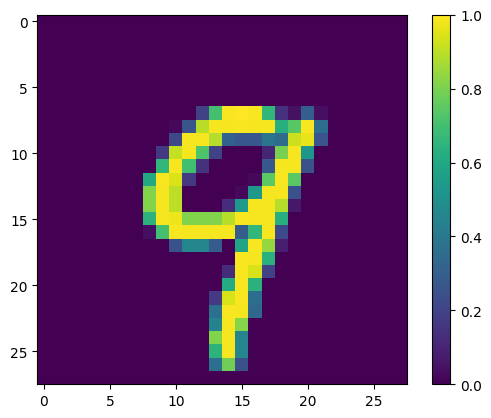

In [56]:
print(category[np.argmax(prediction[12])])
plt.figure()
plt.imshow(test[12])
plt.colorbar()
plt.grid(False)
plt.show